# About this kernel
This kernel may (or may not) be helpful in your long and often tedious machine learning journey. This kernel is easily understandable to the beginner like me.  This verbosity tries to explain everything I could possibly know. Once you get through the notebook, you can find this useful and straightforward. I attempted to explain things as simple as possible.

In this kernel, I'm going to attempt the only Machine learning Algorithms to predict if a passenger survived from the sinking Titanic or not. So it's a binary classification problem. 

Keep Learning,

vikas singh


# CONTEXT
* [1. Importing packages and Collecting Data](#1)
* [2. Variable Description and Identification](#2)
  * [2.1 Categorical and Numerical Variables ](#2.1)
  * [2.2 Variable Data Types](#2.2)
  * [2.3 Data Description](#2.3)
  * [2.4 Missing Variables](#2.4)
* [3. Feature Engineering Or Data Preprocessing](#3)
  * [3.1 Process Cabin](#3.1)
  * [3.2 Process Name](#3.2)
  * [3.3 Process SibSp & Parch](#3.3)
  * [3.4 Process Ticket](#3.4)
  * [3.5 Outliers Detection](#3.5)
    * [3.5.1 Outliers detection for Fare](#3.5.1)
    * [3.5.1 Outliers detection for Age](#3.5.2)
  * [3.6 Imputing Missing Variables](#3.6)
     * [3.6.1 Imputing Embarked and Fare](#3.6.1)
     * [3.6.2 Impute Age](#3.6.2)
  * [3.7 Data Transformation](#3.7)
      * [3.7.1 Binning Age](#3.7.1)
      * [3.7.2 Binning Fare](#3.7.2)
  * [3.8 Correcting Data Type](#3.8)
  * [3.9 Dropping Features](#3.9)
  * [3.10 Encoding Categorical Variables](#3.10)
* [4.Model Building and Evaluation](#4)
  * [4.1 Training Model](#4.1)
  * [4.2 Cross-validation: Evaluating estimator performance](#4.2)
    * [4.2.1 K-Fold Cross Validation](#4.2.1)
    * [4.2.2 Tuning Hyperparameters](#4.2.2)
  * [4.3 Retrain and Predict Using Optimized Hyperparameters](#4.3)
*  [5.Prediction & Submission](#5)
*  [6. Introduction to Ensemble](#6)
   * [6.1 Different Ensemble Methods](#6.1)
     * [6.1.1 Simple Ensemble Methods](#6.1.1)

# 1. Importing packages and Collecting Data <a id="1"></a>

In [1]:
# Data Manipulattion
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Importing Dependencies
%matplotlib inline

# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read and preview the train data from csv file.
train = pd.read_csv('../input/train.csv')
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
# Read and preview the test data from csv file.
test = pd.read_csv('../input/test.csv')
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


# 2. Variable Description and Identification <a id="2"></a>
Describe what each of the variable indicates and identify our response and predictor variables. Then seperate the categorical variables from numerical variables and finally identify pandas data types (i.e., object, float64 or int64) for every variable.

In [4]:
# Merge train and test data together. This eliminates the hassle of handling train and test data seperately for various analysis.
merged = pd.concat([train,test], sort = False)
merged.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [5]:
# Let's see the shape of the combined data
merged.shape

(1309, 12)

In [6]:
# variable in the combined data
merged.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### So what can we see??
**We can see total 12 variables. And each variable has 1309 observations (excluding Survived).**
### Here comes the description of all variables:
1. **PassengerId** is a unique identifying number assigned to each passenger.
2. **Survived** is a flag that indicates if a passenger survived or died ( i.e., 0 = No, 1 = Yes).
3. **Pclass** is the passenger class (i.e., 1 = 1st class, 2 = 2nd class, 3 = 3rd class).
4. **Name** is the name of the passenger.
5. **Sex** indicates the gender of the passenger (i.e., Male or female).
6. **Age** indicates the age of the passenger.
7. **Sibsp**  is the number of siblings/spouses aboard.
8. **Parch** is the number of parents/children aboard.
9. **Ticket** indicates the ticket number issued to the passenger.
10. **Fare** indicates the amount of money spent on their ticket.
11. **Cabin** indicates the cabin category occupied by the passenger.
12. **Embarked** indicates the port where the passenger embarked from (i.e., C = Cherbourg, Q = Queenstown, S = Southampton).


### Here, Survived is the target variable and rest of the variables are predictor variables.

## 2.1 Categorical and Numerical Variables  <a id="2.1"></a>
**Categorical Variable:** Survived, Sex, Pclass (ordinal), Embarked, Cabin, Name, Ticket, SibSp, and Parch.

**Numerical Variable:** Fare, Age, and PassengerId.

## 2.2 Variable Data Types <a id="2.1"></a>


In [7]:
# data types of different variables
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


  * Three float variables: - Age, Fare, and Survived.
  * Four int variables: - Pclass, SibSp, Parch and PassengerId
  * Five Object(number+strings) variables: -  Name, Sex, Ticket, Cabin,       and Embarked.

## 2.3 Data Description <a id="2.3"></a>

In [8]:
# Description of the data variables
merged.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


## 2.4 Missing Variables <a id="2.4"></a>

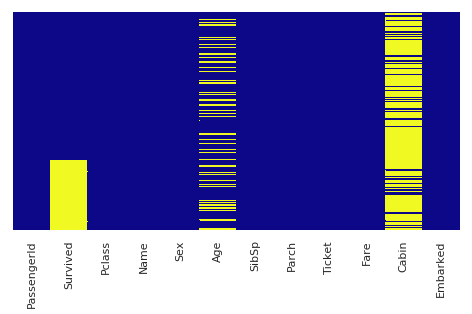

In [9]:
# Visualization of Missing variables
plt.figure(figsize=(8,4))
sns.heatmap(merged.isnull(), yticklabels=False, cbar=False, cmap='plasma')

In [10]:
# Count of missing variables
merged.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

  * Survived column is showing missing values becuase in test.csv don't       have the survived column.
  * Age, Cabin, Fare and Embarked has missing values.

# 3. Feature Engineering Or Data Preprocessing <a id="3"></a>
In this section, we transform raw data into understandable format.  We would engineer features like Cabin, Name, SibSp & Parch, and Ticket that could tell us something about survival or death once they're processed.

## 3.1 Process Cabin <a id="3.1"></a>

In [11]:
# let's preview the cabin again.
merged['Cabin'].head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

In [12]:
# we see that Cabin contains some missing values. let's count it again.
merged['Cabin'].isnull().sum()

1014

In [13]:
# Let's manully understand the Cabin column.
merged['Cabin'].value_counts().head()

C23 C25 C27        6
B57 B59 B63 B66    5
G6                 5
D                  4
C22 C26            4
Name: Cabin, dtype: int64

  * Looks like Cabin is alphanumeric type variable with no special characters (like ., /, % etc) between letters and numbers.
  * It has also 1014 missing obsevations.
  * It is reasonable to presume that those NaNs didn't have a cabin.
  * We will flag NaN as 'X' and keep only the 1st character where Cabin has alphanumeric values.

In [14]:
# let's fill all NaNs of cabin as 'X'
merged['Cabin'].fillna(value = 'X', inplace=True)

In [15]:
# Keeping 1st charater from the Cabin
merged['Cabin'] = merged['Cabin'].apply(lambda x: x[0])
merged['Cabin'].value_counts()

X    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Cabin, dtype: int64

## 3.2 Process Name <a id="3.2"></a>

In [16]:
#Let's see the Name column.
merged['Name'].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

  * This column contains string that furth contains titles such as Mr, Mrs, Master etc.
  * These title give us useful information about sex and age for example Mr=Male, Mrs=Female and married, miss= Female and young.
  * Now we want to extract these titles from Name to check if there is any association between these titles and Survived.

In [17]:
# Extracting title from Name and create a new variable Title.
merged['Title'] = merged['Name'].str.extract('([A-Za-z]+)\.')
merged['Title'].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

In [18]:
# let's see the different categories of Title from Name column.
merged['Title'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Dr            8
Rev           8
Col           4
Major         2
Mlle          2
Ms            2
Lady          1
Dona          1
Countess      1
Don           1
Jonkheer      1
Capt          1
Mme           1
Sir           1
Name: Title, dtype: int64

  * We can see there are several titles with the very least frequency. So, it makes sense to put them in fewer buckets.
  * Professionals like Dr, Rev, Col, Major, Capt will be put into 'Officer' bucket.
  * Titles such as Dona, Jonkheer, Countess, Sir, Lady, Don were usually entitled to the aristocrats.
  * We would also replace Mlle and Ms with Miss and Mme by Mrs as these are French titles.

In [19]:
# Replacing  Dr, Rev, Col, Major, Capt with 'Officer'
merged['Title'].replace(to_replace = ['Dr', 'Rev', 'Col', 'Major', 'Capt'], value = 'Officer', inplace=True)

# Replacing Dona, Jonkheer, Countess, Sir, Lady with 'Aristocrate'
merged['Title'].replace(to_replace = ['Dona', 'Jonkheer', 'Countess', 'Sir', 'Lady', 'Don'], value = 'Aristocrat', inplace = True)

#  Replace Mlle and Ms with Miss. And Mme with Mrs.
merged['Title'].replace({'Mlle':'Miss', 'Ms':'Miss', 'Mme':'Mrs'}, inplace = True)

In [20]:
# let's see how Tittle looks now
merged['Title'].value_counts()

Mr            757
Miss          264
Mrs           198
Master         61
Officer        23
Aristocrat      6
Name: Title, dtype: int64

## 3.3 Process SibSp & Parch <a id="3.3"></a>
 Since these two variables together indicate the size of a family, we would create a new variable 'Family_size' from these two variables.

In [21]:
# Merging Sibsp and Parch and creating new variable called 'Family_size'
merged['Family_size'] = merged.SibSp + merged.Parch + 1  # Adding 1 for single person
merged['Family_size'].value_counts()

1     790
2     235
3     159
4      43
6      25
5      22
7      16
11     11
8       8
Name: Family_size, dtype: int64

  * We see there are several family sizes with the very least frequency like 2,3 and some have large frequency 7,8,11
  * We will create 4 buckets namely single, small, medium, and large for rest of them.

In [22]:
# Create buckets of single, small, medium, and large and then put respective values into them.
merged['Family_size'].replace(to_replace = [1], value = 'single', inplace = True)
merged['Family_size'].replace(to_replace = [2,3], value = 'small', inplace = True)
merged['Family_size'].replace(to_replace = [4,5], value = 'medium', inplace = True)
merged['Family_size'].replace(to_replace = [6, 7, 8, 11], value = 'large', inplace = True)

In [23]:
# let's see how 'Family_size' looks now
merged['Family_size'].value_counts()

single    790
small     394
medium     65
large      60
Name: Family_size, dtype: int64

## 3.4 Process Ticket <a id="3.4"></a>

In [24]:
# let's preview the Ticket variable.
merged['Ticket'].head(10)

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
5              330877
6               17463
7              349909
8              347742
9              237736
Name: Ticket, dtype: object

  * Ticket variable contains alphanumeric, only numbers and character type variables.
  *  We will create two groups-one will contain just number and other will only contain character extracted from string.
  * And assign 'N' to the number type variable.
  * If a row contains both character and number, we will keep only character.
  

In [25]:
# Assign N if there is only number and no character. If there is a character, extract the character only.
ticket = []
for x in list(merged['Ticket']):
    if x.isdigit():
        ticket.append('N')
    else:
         ticket.append(x.replace('.','').replace('/','').strip().split(' ')[0])
# Swap values
merged['Ticket'] = ticket

In [26]:
# Let's count the categories in  Ticket
merged['Ticket'].value_counts()

N          957
PC          92
CA          68
A5          28
SOTONOQ     24
WC          15
SCPARIS     14
STONO       14
A4          10
FCC          9
C            8
SOC          8
SOPP         7
STONO2       7
SCParis      5
SCAH         5
PP           4
WEP          4
LINE         4
FC           3
SOTONO2      3
PPP          2
SCA4         2
SC           2
SWPP         2
SP           1
LP           1
AS           1
AQ3          1
CASOTON      1
AQ4          1
SCA3         1
A            1
SCOW         1
STONOQ       1
Fa           1
SOP          1
Name: Ticket, dtype: int64

In [27]:
# Keeping only the 1st character to reduce the Ticket categories
merged['Ticket'] = merged['Ticket'].apply(lambda x : x[0])
merged['Ticket'].value_counts()

N    957
S     98
P     98
C     77
A     42
W     19
F     13
L      5
Name: Ticket, dtype: int64

## 3.5 Outliers Detection <a id="3.5"></a>
In statistics, an outlier is a data point that significantly differs from the other data points in a sample. Often, outliers in a data set can alert statisticians to experimental abnormalities or errors in the measurements taken, which may cause them to omit the outliers from the data set. If they do omit outliers from their data set, significant changes in the conclusions drawn from the study may result.

**See the data Description table above for  min, 1st quartile, 2nd quartile(median), 3rd quartile, and max values of a variable.**

**We will use IQR method to detect the outliers for variable Age and Fare though we won't remove them.**


In [28]:
# Create a function to count total outliers.
def outliers(variable):
    global filtered # Global keyword is used inside a function only when we want to do assignments or when we want to change a variable.
    
    # Calculate 1st, 3rd quartiles and iqr.
    q1, q3 = variable.quantile(0.25), variable.quantile(0.75)
    iqr = q3 - q1
    
    # Calculate lower fence and upper fence for outliers
    l_fence, u_fence = q1 - 1.5*iqr , q3 + 1.5*iqr   # Any values less than l_fence and greater than u_fence are outliers.
    
    # Observations that are outliers
    outliers = variable[(variable<l_fence) | (variable>u_fence)]
    print('Total Outliers of', variable.name,':', outliers.count())
    
    # Drop obsevations that are outliers
    filtered = variable.drop(outliers.index, axis = 0)

### 3.5.1 Outliers detection for Fare <a id="3.5.1"></a>

In [29]:
# Total number of outliers in Fare
outliers(merged['Fare'])

Total Outliers of Fare : 171


Text(0.5, 1.0, 'Fare distribution with outliers')

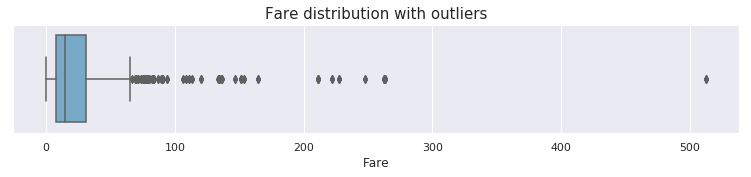

In [30]:
# Visualisation of Fare distribution with outliers
plt.figure(figsize=(13, 2))
sns.boxplot(x=merged["Fare"],palette='Blues')
plt.title('Fare distribution with outliers', fontsize=15 )

Text(0.5, 1.0, 'Fare distribution with outliers')

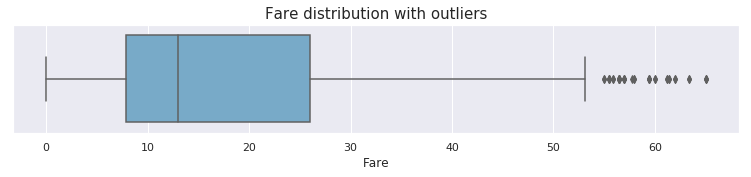

In [31]:
# Visualisation of Fare distribution without outliers
plt.figure(figsize=(13, 2))
sns.boxplot(x=filtered,palette='Blues')
plt.title('Fare distribution with outliers', fontsize=15 )

### 3.5.2 Outliers detection for Age <a id="3.5.2"></a>

In [32]:
# Total number of outliers in Age
outliers(merged['Age'])

Total Outliers of Age : 9


Text(0.5, 1.0, 'Age distribution with outliers')

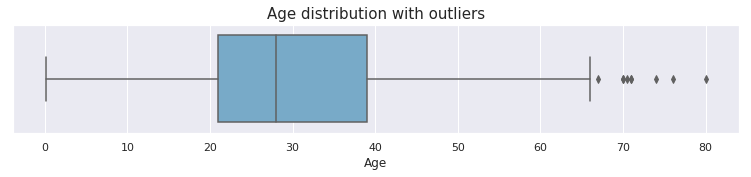

In [33]:
# Visualisation of Age distribution with outliers
plt.figure(figsize=(13, 2))
sns.boxplot(x=merged["Age"],palette='Blues')
plt.title('Age distribution with outliers', fontsize=15)

Text(0.5, 1.0, 'Age distribution without outliers')

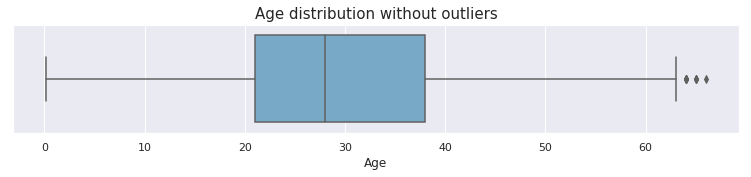

In [34]:
# Visualisation of Age distribution without outliers
plt.figure(figsize=(13, 2))
sns.boxplot(x=filtered,palette='Blues')
plt.title('Age distribution without outliers', fontsize=15)

## 3.6 Imputing Missing Variables <a id="3.6"></a>
There is various techniques to imputing missing variable in the datasets for exmaple linear regession, K-NN, Mean/mode/median, Deep learning etc. The simpliest way to impute missing values of a variable is to impute its missing values with its mean, median or mode depending on its distribution and variable type(categorical or numerical). 

However, one clear disadvantage of using mean, median or mode to impute missing values is the addition of bias if the amount of missing values is significant (like Age). So simply replacing them with the mean or the median age might not be the best solution since the age may differ by groups and categories of passengers.

To solve this, we can group our data by some variables that have no missing values and for each subset compute the median age to impute the missing values.

In [35]:
# let's count the missing values for each variable
merged.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin            0
Embarked         2
Title            0
Family_size      0
dtype: int64

 * Survived column is showing missing values becuase in test.csv don't       have the survived column.
 * Age, Cabin, Fare and Embarked has missing values.

### 3.6.1 Imputing Embarked and Fare <a id="3.6.1"></a>

In [36]:
# imputing Embarked with mode because Embarked is a categorical variable.
merged['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [37]:
# Here S is the most frequent
merged['Embarked'].fillna(value = 'S', inplace = True)

In [38]:
# Impute missing values of Fare. Fare is a numerical variable with outliers. Hence it will be imputed by median.'''
merged['Fare'].fillna(value = merged['Fare'].median(), inplace = True)

### 3.6.2 Impute Age <a id="3.6.2"></a>
To impute Age with grouped median, we need to know which features are heavily correlated with Age. Let's find out the variables correlated with Age.

In [39]:
# Let's plot correlation heatmap to see which variable is highly correlated with Age. We need to convert categorical variable into numerical to plot correlation heatmap. So convert categorical variables into numerical.
df = merged.loc[:, ['Sex', 'Pclass', 'Embarked', 'Title', 'Family_size', 'Parch', 'SibSp', 'Cabin', 'Ticket']]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df = df.apply(le.fit_transform) # data is converted.
df.head(2)

,Sex,Pclass,Embarked,Title,Family_size,Parch,SibSp,Cabin,Ticket
0,1,2,2,3,3,0,1,8,0
1,0,0,0,4,3,0,1,2,5


In [40]:
 # Inserting Age in variable correlation.
df['Age'] = merged['Age']
# Move Age at index 0.
df = df.set_index('Age').reset_index()
df.head(2)

,Age,Sex,Pclass,Embarked,Title,Family_size,Parch,SibSp,Cabin,Ticket
0,22.0,1,2,2,3,3,0,1,8,0
1,38.0,0,0,0,4,3,0,1,2,5


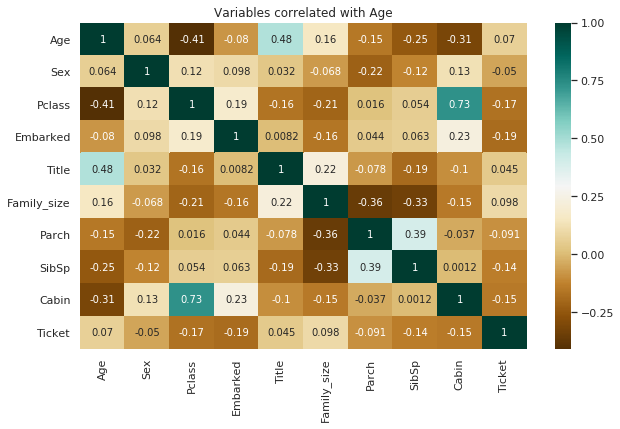

In [41]:
# Now create the heatmap correlation of df
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap ='BrBG',annot = True)
plt.title('Variables correlated with Age')
plt.show()

  * Sex, Embarked, and Ticket have the weakest correlation with Age.
  * Pclass and Title have strong correlation with age.
  **So the tactic is to impute missing values of Age with the median age of similar rows according to Title and Pclass.**

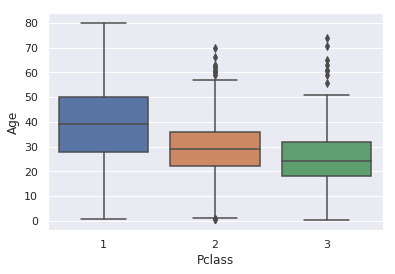

In [42]:
# Create a boxplot to view the correlated and medium of the Pclass and Title variables with Age.
# Boxplot b/w Pclass and Age
sns.boxplot(y='Age', x='Pclass', data=merged)

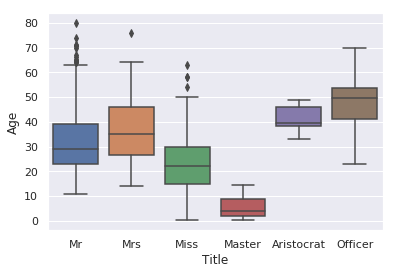

In [43]:
# Boxplot b/w Title and Age
sns.boxplot(y='Age', x='Title', data=merged)

In [44]:
# Impute Age with median of respective columns (i.e., Title and Pclass)
merged['Age'] = merged.groupby(['Title', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))

In [45]:
# let's check the missing value again.
merged.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
Title            0
Family_size      0
dtype: int64

## 3.7 Data Transformation <a id="3.7"></a>
In this section, we will transform our continuous variables. After that, redundant and useless features will be deleted. And finally categorical variables will be encoded into numerical to feed our machine learning models.

### 3.7.1 Binning Age <a id="3.7.1"></a>

In [46]:
# Creating bin categories for Age 
label_names = ['infant', 'child', 'teenager','young_adult', 'adult', 'aged']

# Create range for each bin categrories of age
cut_points = [0,5,12,18,35,60,81]

#Create and view categorized Age with original Age.
merged['Age_binned'] = pd.cut(merged['Age'], cut_points, labels = label_names)

#Age with Categorized Age.
merged[['Age', 'Age_binned']].head(2)

,Age,Age_binned
0,22.0,young_adult
1,38.0,adult


### 3.7.2 Binning Fare <a id="3.7.2"></a>

In [47]:
# Create bin categories for Fare
groups = ['low','medium','high','very_high']

# Create range for each bin categories of Fare
cut_points = [-1, 130, 260, 390, 520]

#Create and view categorized Fare with original Fare
merged['Fare_binned'] = pd.cut(merged.Fare, cut_points, labels = groups)

# Fare with Categorized Fare
merged[['Fare', 'Fare_binned']].head(2)

,Fare,Fare_binned
0,7.2500,low
1,71.2833,low


#### (Optional) Standarding Fare

In [48]:
# import scaling model
#from sklearn.preprocessing import MinMaxScaler

#Create a scaler object
#scaler = MinMaxScaler()

# Fit and transform the merged['Fare']
#merged['Fare'] = scaler.fit_transform(merged['Fare'].values.reshape(-1,1))
#merged['Fare'].head()

** we have option to do binning and standarding of continuous variables but here we did binning for get more accuary in the Desicion tree and Random forest classifier**

## 3.8 Correcting Data Type <a id="3.8"></a>

In [49]:
# checking the data type
merged.dtypes

PassengerId       int64
Survived        float64
Pclass            int64
Name             object
Sex              object
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked         object
Title            object
Family_size      object
Age_binned     category
Fare_binned    category
dtype: object

In [50]:
# Correcting data types, converting into categorical variables.
merged.loc[:, ['Pclass', 'Sex', 'Embarked', 'Cabin', 'Title', 'Family_size', 'Ticket']] = merged.loc[:, ['Pclass', 'Sex', 'Embarked', 'Cabin', 'Title', 'Family_size', 'Ticket']].astype('category')

# Due to merging there are NaN values in Survived for test set observations.
merged['Survived'] = merged['Survived'].dropna().astype('int') #Converting without dropping NaN throws an error

In [51]:
# Check if data types have been corrected
merged.dtypes

PassengerId       int64
Survived          int64
Pclass         category
Name             object
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket         category
Fare            float64
Cabin          category
Embarked       category
Title          category
Family_size    category
Age_binned     category
Fare_binned    category
dtype: object

## 3.9 Dropping Features <a id="3.9"></a>
Now we have both transformed and the original variables transformation have been made from. So we should safely drop the variables that we think would not be useful anymore for our survival analysis since they are very unlikely to be analyzed in their raw forms.

In [52]:
# let's see all the variables
merged.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_size,Age_binned,Fare_binned
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A,7.2500,X,S,Mr,small,young_adult,low
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,P,71.2833,C,C,Mrs,small,adult,low


In [53]:
# droping the feature that would not be useful anymore
merged.drop(columns = ['Name', 'Age','SibSp', 'Parch','Fare'], inplace = True, axis = 1)
merged.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Ticket', 'Cabin',
       'Embarked', 'Title', 'Family_size', 'Age_binned', 'Fare_binned'],
      dtype='object')

## 3.10 Encoding Categorical Variables <a id="3.10"></a>
We would like to use one hot encoding instead of label encoding. a one-hot encoding can be applied to the integer representation. This is where the integer encoded variable is removed and a new binary variable is added for each unique integer value.

In [54]:
# convert categotical data into dummies variables
merged = pd.get_dummies(merged, drop_first=True)
merged.head(2)

,PassengerId,Survived,Pclass_2,Pclass_3,Sex_male,Ticket_C,Ticket_F,Ticket_L,Ticket_N,Ticket_P,...,Family_size_single,Family_size_small,Age_binned_child,Age_binned_teenager,Age_binned_young_adult,Age_binned_adult,Age_binned_aged,Fare_binned_medium,Fare_binned_high,Fare_binned_very_high
0,1,0,0,1,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
1,2,1,0,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


# 4.Model Building and Evaluation <a id="4"></a>

In [55]:
#Let's split the train and test set to feed machine learning algorithm.
train = merged.iloc[:891, :]
test  = merged.iloc[891:, :]

In [56]:
#Drop passengerid from train set and Survived from test set.'''
train = train.drop(columns = ['PassengerId'], axis = 1)
test = test.drop(columns = ['Survived'], axis = 1)

In [57]:
# setting the data as input and output for machine learning models
X_train = train.drop(columns = ['Survived'], axis = 1) 
y_train = train['Survived']

# Extract test set
X_test  = test.drop("PassengerId", axis = 1).copy()

In [58]:
# See the dimensions of input and output data set.'''
print('Input Matrix Dimension:  ', X_train.shape)
print('Output Vector Dimension: ', y_train.shape)
print('Test Data Dimension:     ', X_test.shape)

Input Matrix Dimension:   (891, 36)
Output Vector Dimension:  (891,)
Test Data Dimension:      (418, 36)


## 4.1 Training Model <a id="4.1"></a>
We would train 5 different classifiers for this binary classification problem.

In [59]:
# Now initialize all the classifiers object.

#1.Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

#2.KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

#3.Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 40)

#4.Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 40, n_estimators = 100)

#5.Support Vector Machines
from sklearn.svm import SVC
svc = SVC(gamma = 'auto')

#6. XGBoost 
from xgboost import XGBClassifier
xgb = XGBClassifier(n_job = -1, random_state = 40)

In [60]:
# Create a function that returns train accuracy of different models.

def train_accuracy(model):
    model.fit(X_train, y_train)
    train_accuracy = model.score(X_train, y_train)
    train_accuracy = np.round(train_accuracy*100, 2)
    return train_accuracy
    
# making the summary table of train accuracy.
train_accuracy = pd.DataFrame({'Train_accuracy(%)':[train_accuracy(lr), train_accuracy(knn), train_accuracy(dt), train_accuracy(rf), train_accuracy(svc), train_accuracy(xgb)]})
train_accuracy.index = ['LR', 'KNN','DT', 'RF', 'SVC', 'XGB']
sorted_train_accuracy = train_accuracy.sort_values(by = 'Train_accuracy(%)', ascending = False)

#Training Accuracy of the Classifiers
sorted_train_accuracy

,Train_accuracy(%)
DT,89.79
RF,89.79
XGB,85.63
KNN,84.85
LR,84.18
SVC,79.91


**IN the above table, DT, RF, XGB, KNN models have highest train accuracy. But train accuracy of a model is not enough to tell if a model can be able to generalize the unseen data or not.
we can't use training accuracy for our model evaluation rather we must know how our model will perform on the data our model is yet to see.**

## 4.2 Cross-validation: Evaluating estimator performance <a id="4.2"></a>
Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data. This situation is called **overfitting.**

One thing we can do is to split the train set in two groups, usually in 80:20 ratio. That means we would train our model on 80% of the training data and we reserve the rest 20% for evaluating the model since we know the ground truth for this 20% data. This is the first model evaluation technique. In sklearn we have a train_test_split method for that.

But Train_test split has its drawbacks. Because this approach introduces bias as we are not using all of our observations for testing and also we're reducing the train data size. To overcome this we can use a technique called **cross validation** where all the data is used for training and testing periodically.

However, as the train set gets larger, train_test_split has its advantage over k-fold cross validation. Train_test_split is k-times faster than k-fold cross validation. If the training set is very large, both train_test_split and k-fold cross validation perform identically. So for a large training data, train_test_split is prefered over k-fold cross validation to accelerate the training process.

### 4.2.1 K-Fold Cross Validation ¶<a id="4.2.1"></a>

Let's say we will use 10-fold cross validation. So k = 10 and we have total 891 observations. Each fold would have 891/10 = 89.1 observations. So basically k-fold cross validation uses fold-1 (89.1 samples) as the testing set and k-1 (9 folds) as the training sets and calculates test accuracy.This procedure is repeated k times (if k = 10, then 10 times); each time, a different group of observations is treated as a validation or test set. This process results in k estimates of the test accuracy which are then averaged out.

In [61]:
# Create a function that returns mean cross validation score for different models.
def val_score(model):
    from sklearn.model_selection import cross_val_score
    val_score = cross_val_score(model, X_train, y_train, cv = 10, scoring = 'accuracy').mean()
    val_score = np.round(val_score*100, 2)
    return val_score

# making the summary table of cross validation accuracy.
val_score = pd.DataFrame({'val_score(%)':[val_score(lr), val_score(knn), val_score(dt), val_score(rf), val_score(svc), val_score(xgb)]})
val_score.index = ['LR', 'KNN','DT', 'RF', 'SVC', 'XGB']
sorted_val_score = val_score.sort_values(by = 'val_score(%)', ascending = False)

#cross validation accuracy of the Classifiers
sorted_val_score

,val_score(%)
LR,82.95
XGB,81.71
RF,81.49
DT,80.93
KNN,80.60
SVC,79.57


**In the above tabel, LR and KNN have the highest cross validation accuracy among the remaining models.**

### 4.2.2 Tuning Hyperparameters <a id="4.2.2"></a>
Now let's add Grid Search to all the classifiers with the hopes of optimizing their hyperparameters and thus **improving their accuracy**. Are the default model parameters the best bet? Let's find out.

**For more detail visit on sklearn documention for individual models.**


In [62]:
# define all the model hyperparameters one by one first

# 1. For logistic regression
lr_params = {'penalty':['l1', 'l2'],
             'C': np.logspace(0, 2, 4, 8 ,10)}

# 2. For KNN
knn_params = {'n_neighbors':[4,5,6,7,8,9,10],
              'weights':['uniform', 'distance'],
              'algorithm':['auto', 'ball_tree','kd_tree','brute'],
              'p':[1,2]}

# 3. For DT
dt_params = {'max_features': ['auto', 'sqrt', 'log2'],
             'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 
             'min_samples_leaf':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
             'random_state':[46]}
# 4. For RF
rf_params = {'criterion':['gini','entropy'],
             'n_estimators':[ 10, 30, 200, 400],
             'min_samples_leaf':[1, 2, 3],
             'min_samples_split':[3, 4, 6, 7], 
             'max_features':['sqrt', 'auto', 'log2'],
             'random_state':[46]}
# 5. For SVC
svc_params = {'C': [0.1, 1, 10,100], 
              'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
              'gamma': [ 1, 0.1, 0.001, 0.0001]}

#6. For XGB
xgb_params = xgb_params_grid = {'min_child_weight': [1, 5],
                   'gamma': [0.04, 0, 0.1, 1.5],
                   'subsample': [0.6, 0.8, 1.0],
                   'colsample_bytree': [0.46, 1.0],
                   'max_depth': [3, 7]}

In [63]:
# Create a function to tune hyperparameters of the selected models.
def tune_hyperparameters(model, param_grid):
    from sklearn.model_selection import GridSearchCV
    global best_params, best_score #if you want to know best parametes and best score
    
    # Construct grid search object with 10 fold cross validation.
    grid = GridSearchCV(model, param_grid, verbose = 3, cv = 10, scoring = 'accuracy', n_jobs = -1)
    # Fit using grid search.
    grid.fit(X_train, y_train)
    best_params, best_score = grid.best_params_, np.round(grid.best_score_*100, 2)
    return best_params, best_score

In [64]:
# Appling tune hyperparameters in the created funtion

# Tune LR hyperparameters.
tune_hyperparameters(lr, param_grid=lr_params)
lr_best_params, lr_best_score =  best_params, best_score
print('LR Best Score:', lr_best_score)
print('And Best Parameters:', lr_best_params)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    3.1s


LR Best Score: 83.16
And Best Parameters: {'C': 4.641588833612778, 'penalty': 'l1'}


[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    4.5s finished


In [65]:
# Tune KNN hyperparameters
tune_hyperparameters(knn, param_grid=knn_params)
knn_best_params, knn_best_score =  best_params, best_score

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 112 candidates, totalling 1120 fits


[Parallel(n_jobs=-1)]: Done 216 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 1120 out of 1120 | elapsed:    6.4s finished


In [66]:
# Tune DT hyperparameters
tune_hyperparameters(dt, param_grid=dt_params)
dt_best_params, dt_best_score =  best_params, best_score

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 462 candidates, totalling 4620 fits


[Parallel(n_jobs=-1)]: Done 1304 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 4620 out of 4620 | elapsed:   10.6s finished
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [67]:
# Tune RF hyperparameters
tune_hyperparameters(rf, param_grid=rf_params)
rf_best_params, rf_best_score =  best_params, best_score

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 288 candidates, totalling 2880 fits


[Parallel(n_jobs=-1)]: Done  84 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 189 tasks      | elapsed:   25.5s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   46.2s
[Parallel(n_jobs=-1)]: Done 573 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 861 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1213 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 1629 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 2109 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 2653 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 2880 out of 2880 | elapsed:  6.3min finished


In [68]:
# Tune SVC hyperparameters
tune_hyperparameters(svc, param_grid=svc_params)
svc_best_params, svc_best_score =  best_params, best_score

Fitting 10 folds for each of 64 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:   10.1s finished


In [69]:
# Tune XGB hyperparameters
xgb_opt = XGBClassifier(learning_rate = 0.04, n_estimators = 500, 
                       silent = 1, nthread = -1, random_state = 101)
tune_hyperparameters(xgb_opt, param_grid=xgb_params)
xgb_best_params, xgb_best_score =  best_params, best_score

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 96 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   23.9s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   53.8s
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:  4.1min finished


In [70]:
# lets compares cross validation scores with tunned scores for different models.
# Create a dataframe of tunned scores and sort them in descending order.'''
tunned_scores = pd.DataFrame({'Tunned_accuracy(%)': [lr_best_score, knn_best_score, dt_best_score, rf_best_score, svc_best_score, xgb_best_score]})
tunned_scores.index = ['LR', 'KNN', 'DT', 'RF', 'SVC', 'XGB']
sorted_tunned_scores = tunned_scores.sort_values(by = 'Tunned_accuracy(%)', ascending = False)
# Models Accuracy after Optimization
sorted_tunned_scores

,Tunned_accuracy(%)
RF,83.61
SVC,83.39
LR,83.16
XGB,83.16
DT,82.27
KNN,82.15


when we copares the cross validation scores with tunned scores we can see that all the classifier are improved.  Among the classifiers, RF and SVC have the highest accuracy after tunning hyperparameters.

## 4.3 Retrain and Predict Using Optimized Hyperparameters <a id="4.3"></a>

So we have our best classifiers with their best hyperparameters that produces best accuracy out of a model. That means if we retrain the classifiers using their best hyperparameters, we will be able to get the very same score that we got after tunning hyperparameters (see part 14.4). Let's retrain our classifiers and then use cross validation to calculate the accuracy of the trained model. 

In [71]:
# Instantiate the models with optimized hyperparameters.
lr  = LogisticRegression(**lr_best_params)
knn = KNeighborsClassifier(**knn_best_params)
dt  = DecisionTreeClassifier(**dt_best_params)
rf  = RandomForestClassifier(**rf_best_params)
svc = SVC(**svc_best_params)
xgb = XGBClassifier(**xgb_best_params)

In [72]:
# Train all the models with optimised hyperparameters
models = { 'LR': lr, 'KNN':knn,'DT':dt,'RF':rf, 'SVC':svc, 'XGB':xgb}

# 10-fold Cross Validation after Optimization
score = []
for x, (keys, items) in enumerate(models.items()):
    # Train the models with optimized parameters using cross validation.
    # No need to fit the data. cross_val_score does that for us.
    # But we need to fit train data for prediction in the follow session.
    from sklearn.model_selection import cross_val_score
    items.fit(X_train, y_train)
    scores = cross_val_score(items, X_train, y_train, cv = 10, scoring = 'accuracy')*100
    score.append(scores.mean())
    print('Mean Accuracy: %0.4f (+/- %0.4f) [%s]'  % (scores.mean(), scores.std(), keys))

Mean Accuracy: 83.1707 (+/- 3.4470) [LR]
Mean Accuracy: 82.1569 (+/- 3.1023) [KNN]
Mean Accuracy: 82.2768 (+/- 3.8408) [DT]
Mean Accuracy: 83.6139 (+/- 3.1445) [RF]
Mean Accuracy: 83.3917 (+/- 3.0357) [SVC]
Mean Accuracy: 83.1694 (+/- 3.6043) [XGB]


In [73]:
# Make prediction using all the trained models
model_prediction = pd.DataFrame({'LR':lr.predict(X_test), 'KNN':knn.predict(X_test), 'DT':dt.predict(X_test),'RF':rf.predict(X_test), 'SVC':svc.predict(X_test), 'XGB': xgb.predict(X_test)})

#All the Models Prediction 
model_prediction.head()

,LR,KNN,DT,RF,SVC,XGB
0,0,0,0,0,0,0
1,1,0,1,0,1,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,1,1,1,1,1,0


# 5. Prediction & Submission <a id="5"></a>
we will predict using both rf and svc. Then we will create two prediction files in csv format for kaggle submission.

In [74]:
# Submission with the most accurate random forest classifier
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": rf.predict(X_test)})
submission.to_csv('submission_rf.csv', index = False)


# Submission with the most accurate SVC classifier.
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": svc.predict(X_test)})
submission.to_csv('submission_svc.csv', index = False)

# Submission with the most accurate XGB classifier.
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": xgb.predict(X_test)})
submission.to_csv('submission_xgb.csv', index = False)

# 6. Introduction to Ensemble <a id="6"></a>
Can we further boost the accuracy of our best models? That's what we will try to do using ensemble method. Ensembles combine predictions from different models to generate a final prediction, and the more models we include the better it performs. Better still, because ensembles combine baseline predictions, they perform at least as well as the best baseline model. Most of the errors from a model’s learning are from three main factors: variance, noise, and bias. By using ensemble methods, we’re able to increase the stability of the final model and reduce the errors caused by bias, variance, and noise. By combining many models, we’re able to (mostly) reduce the variance, even when they are individually not great, as we won’t suffer from random errors from a single source. **The main principle behind ensemble modelling is to group weak learners together to form one strong learner. The most basic ensemble is majority voting rule (where the prediction or vote given by the majority of the models used as final prediction).But there are many other ways to combine predictions, and more generally we can use a model to learn how to best combine predictions.**

**To implement an ensemble we need three basic things:**
1. A group of base learners that generate predictions.
2. A meta learner that learns how to best combine these predictions outputed by base learners.
3. And finally a method for splitting the training data between the base learners and the meta learner.

**An ensemble works best if:**
1. There is a less correlation in the base models' predictions.
2. We increase the number of base learners though it might slow the process down.

![](https://cdn-images-1.medium.com/max/1000/0*sOtXk_8ZftGGU00_.png)

## 6.1 Different Ensemble Methods <a id="6.1"></a>
We would first categorize ensemble methods into two subcategories like 1.Simple Ensemble Methods and 2.Advanced Ensemble Methods

### 6.1.1 Simple Ensemble Methods <a id="6.1.1"></a>
They're the simpliest yet so useful form of enselbles. They can be further categorised into 
1. Voting, 
2. Averaging and 
3. Weighted Average. 

First one is usually used for classification while the later two are used for regression problems.

####  Voting Ensemble  
Voting ensemble is further classified into 
1. Hard voting and 
2. Soft voting.

#####  Hard Voting (or Majority Voting or Max Voting) <a id="14.1"></a>
This hard voting method is usually used for classification problems. The idea is to train multiple models to make predictions for each data point. The predictions by each model are considered as a ‘vote’. The predictions which we get from the majority of the models are used as the final prediction. Say rf and lr predict a class as 1 while knn predicts the same class as 0. Since the majority of the vots is casted in favour of class 1, the voting classifier would predict the very same class as 1. See the table below to understand how hard voting ensemble works.****

In [75]:
# Example : How hard voting works
data =[[1, 1, 1, 0, 1],
       [0, 0, 0, 1, 0]]
display(pd.DataFrame(data, columns = ['Class', 'RF', 'LR', 'KNN', 'Hard_voting']).set_index('Class'))

,RF,LR,KNN,Hard_voting
Class,,,,
1,1,1,0,1
0,0,0,1,0


**Correlation among Base Models Predictions:** How base models' predictions are correlated? If base models' predictions are weakly correlated with each other, the ensemble will likely to perform better. On the other hand, for a strong correlation of predictions among the base models, the ensemble will unlikely to perform better. To sumarize, diversity of predictions among the base models is inversely proportional to the ensemble accuracy. Let's make prediction for the test set.

In [76]:
#Create a data frame to store base modles prediction 
base_prediction = model_prediction # we have already make the data frame above of all the models prediction

base_prediction.head()

,LR,KNN,DT,RF,SVC,XGB
0,0,0,0,0,0,0
1,1,0,1,0,1,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,1,1,1,1,1,0


Text(0.5, 1.0, 'Prediction correlation ammong the Base Models')

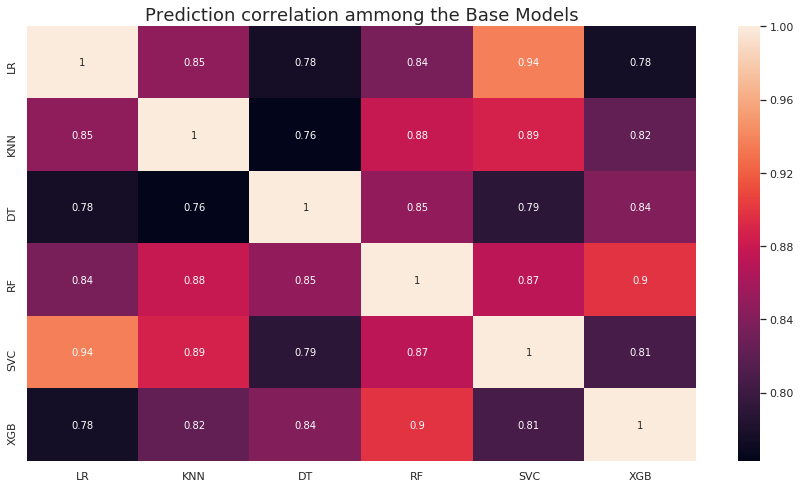

In [77]:
#Let's visualize the correlations among the predictions of base models.
plt.figure(figsize = (15,8))
sns.heatmap(base_prediction.corr(), annot=True)
plt.title('Prediction correlation ammong the Base Models', fontsize = 18)

**Findings:** The prediction looks quite similar for the 6 classifiers except when DT is compared to the others classifiers. Now we will create an ensemble with the base models RF, XGB, DT, KNN, and LR. This ensemble can be called heterogeneous ensemble since we have three tree based, one kernel based and one linear models. We would use **EnsembleVotingClassifier method from mlxtend.classifier module** for both hard and soft voting ensembles. The advantage is it requires lesser codes to plot decision regions and I find it a bit faster than sklearn's voting classifier.

In [78]:
# We will use mlxtend library to train, predict and plot decision regions of hard voting ensemble classifier
# Define base models for hard voting ensemble.
base_models = [lr, knn, dt, rf, xgb]

# Import ensemble classifier from mlxtend
from mlxtend.classifier import EnsembleVoteClassifier

# Initialize hard voting ensemble
hard_evc = EnsembleVoteClassifier(clfs= base_models, voting = 'hard')
print('Training Hard Voting Emsemble Classification')
display(hard_evc.fit(X_train, y_train))
print('-----Done-----')

# Predict with hard voting ensemble.
y_pred_hard_ecv = pd.DataFrame(hard_evc.predict(X_test), columns = ['HARD_ECV'])

# Hard voting cross validation score.
print('\nComputing Hard Voting Cross Val Score')
hard_x_val_score = cross_val_score(hard_evc, X_train, y_train, cv=10,  scoring = 'accuracy')
hard_x_val_score = np.round(hard_x_val_score.mean()*100,2)
print('----Done----')

# Compare hard voting score with best base models scores.
hard_vs_base_score = pd.DataFrame({'Hard_vs_base_score(%)': [hard_x_val_score, lr_best_score, knn_best_score, dt_best_score, rf_best_score, xgb_best_score]})
hard_vs_base_score.index = ['HARD_VAL_SCORE', 'LR', 'KNN', 'DT', 'RF', 'XGB']
display(hard_vs_base_score)

Training Hard Voting Emsemble Classification


EnsembleVoteClassifier(clfs=[LogisticRegression(C=4.641588833612778,
                                                class_weight=None, dual=False,
                                                fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='warn', n_jobs=None,
                                                penalty='l1', random_state=None,
                                                solver='warn', tol=0.0001,
                                                verbose=0, warm_start=False),
                             KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  me...
                                           colsample_bynode=1,
  

-----Done-----

Computing Hard Voting Cross Val Score
----Done----


,Hard_vs_base_score(%)
HARD_VAL_SCORE,84.29
LR,83.16
KNN,82.15
DT,82.27
RF,83.61
XGB,83.16


In [79]:
# See base models prediction with hard voting prediction.
df_hard_base = pd.concat([base_prediction.drop('SVC', axis=1),y_pred_hard_ecv], sort = False, axis = 1)
display(df_hard_base.head(7))

,LR,KNN,DT,RF,XGB,HARD_ECV
0,0,0,0,0,0,0
1,1,0,1,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,1,1,1,1,0,1
5,0,0,0,0,0,0
6,1,1,0,1,1,1


**Great! We can see hard voting ensemble is considering majority of the models vote(prediction) to label a particular class. Thus it can reduce prediction errors when predicted by a single base learners.**

##### Soft Voting
On the other hand, When an ensembles averages based on probabilities we refer to it as soft voting. In an ensemble model, all classifiers (algorithms) are able to estimate class probabilities (i.e., they all have predict_proba() method), then we can specify Scikit-Learn to predict the class with the highest probability, averaged over all the individual classifiers. In a voting classifier setting the voting parameter to 'soft' enables the models to calculate their probability(also known as confidence score) individually and present it to the voting classifier, then the voting classifier averages them and outputs the class with the highest probability. If average probablity of class-1 is greater than class-0, it outputs predicted class is 1 otherwise 0.

Note: This soft-voting classifier often work better than hard-voting as it gives more weight to highly confident votes. We Need to specify voting=”soft” and ensure that all classifiers can estimate class probabilities. One algorithm where we need to be careful is SVC, by default SVC will not give probabilities, we have to specify 'probability' hyperparameter to True. See the table below to understand how soft voting ensemble works.

In [80]:
# Example: how soft voting works
data = [[0.49, 0.99, 0.49, 0.66, 1],
        [0.51, 0.01, 0.51, 0.34, 0]]
display(pd.DataFrame(data, columns=['RF', 'LR', 'KNN', 'Average', 'Soft Voting']))

,RF,LR,KNN,Average,Soft Voting
0,0.49,0.99,0.49,0.66,1
1,0.51,0.01,0.51,0.34,0


**Let's implement soft voting ensemble in mlxtend.**

In [81]:
# Base models for soft voting is the base models of hard voting
# Initialize soft voting ensemble
base_model = [lr, knn, dt, rf, xgb]
soft_evc = EnsembleVoteClassifier(clfs = base_model, voting = 'soft')
print('fitting soft voting ensemble')
display(soft_evc.fit(X_train, y_train))

#Predict with soft voting ensemble
y_pred_soft_evc = pd.DataFrame(soft_evc.predict(X_test), columns = ['SOFT_EVC'])

# Hard voting cross validation score
print('\nComputing Soft Voting X Val Score...')
soft_x_val_score = cross_val_score(soft_evc, X_train, y_train, cv = 10, scoring = 'accuracy')
soft_x_val_score = np.round(soft_x_val_score.mean()*100, 2)
print('----Done----')

# Compare Soft voting score with best base models scores.
soft_vs_base_score = pd.DataFrame({'Soft_Vs_Base_Score': [soft_x_val_score, lr_best_score, knn_best_score, dt_best_score, rf_best_score, xgb_best_score]})
soft_vs_base_score.index = ['SOFT_VAL_SCORE', 'LR', 'KNN', 'DT', 'RF', 'XGB']
display(hard_vs_base_score)

fitting soft voting ensemble


EnsembleVoteClassifier(clfs=[LogisticRegression(C=4.641588833612778,
                                                class_weight=None, dual=False,
                                                fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='warn', n_jobs=None,
                                                penalty='l1', random_state=None,
                                                solver='warn', tol=0.0001,
                                                verbose=0, warm_start=False),
                             KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  me...
                                           colsample_bynode=1,
  


Computing Soft Voting X Val Score...
----Done----


,Hard_vs_base_score(%)
HARD_VAL_SCORE,84.29
LR,83.16
KNN,82.15
DT,82.27
RF,83.61
XGB,83.16


**NICE! Soft voting perform better than all base model.**

# ** WORK IN PROGRESS **

**My other kernel:- **

***Simple Titanic-Exploratory Data Analysis:*** [Here](https://www.kaggle.com/vikassingh1996/titanic-exploratory-data-analysis-the-beginning)

***Extensive Data Preprocessing And Modeling*** [Here](https://www.kaggle.com/vikassingh1996/extensive-data-preprocessing-and-modeling)

**If you find my kernel useful, Some upvotes will be appreciated.**

--Thank you for reading!